In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [2]:
df = pd.read_excel('Air_BNB.xlsx')

In [3]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [4]:
df.shape

(74111, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  float64
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 6.2+ MB


In [6]:
df.drop(['id'], axis=1, inplace=True)

In [8]:
round(df.describe(include='all'),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.16,2.15,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.24,0.58,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107.0,NaN,NaN,NaN,0.73,0.44,0.0,0.0,1.0,1.0,1.0
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.07,7.84,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.27,0.85,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.71,1.25,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [9]:
df['room_type'].nunique()

3

In [26]:
# Loop through each column and if the column is categorical (dtype = 'object'), print its unique values and counts

for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':', df['room_type'].nunique())
        print()
        print(df[column].value_counts())
        print()

ROOM_TYPE : 3

room_type
Entire home/apt    33859
Private room       18413
Shared room         1845
Name: count, dtype: int64

CANCELLATION_POLICY : 3

cancellation_policy
strict      25221
flexible    14569
moderate    14327
Name: count, dtype: int64

INSTANT_BOOKABLE : 3

instant_bookable
f    37838
t    16279
Name: count, dtype: int64



In [11]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [12]:
df.duplicated().sum()

19994

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.isnull().sum()

,0
room_type,5
accommodates,3
bathrooms,195
cancellation_policy,8
cleaning_fee,4
instant_bookable,0
review_scores_rating,10215
bedrooms,92
beds,125
log_price,0


In [15]:
# Handling Missing Values
df.fillna({
    'room_type': df['room_type'].mode()[0],  # Fill missing categorical values with the mode (most frequent value)
    'accommodates': df['accommodates'].mean(),  # Fill missing numerical values with the mean
    'bathrooms': df['bathrooms'].mean(),
    'cancellation_policy': df['cancellation_policy'].mode()[0],  # Fill categorical values with the mode
    'cleaning_fee': df['cleaning_fee'].mean(),
    'review_scores_rating': df['review_scores_rating'].mean(),  # This has many missing, so we fill with the mean
    'bedrooms': df['bedrooms'].mean(),
    'beds': df['beds'].mean()
}, inplace=True)

In [17]:
df.isnull().sum()

,0
room_type,0
accommodates,0
bathrooms,0
cancellation_policy,0
cleaning_fee,0
instant_bookable,0
review_scores_rating,0
bedrooms,0
beds,0
log_price,0


In [18]:
# Encoding Categorical Variables
# Function to encode categorical variables (convert them to numeric)
def encode_data(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            dataframe[column] = dataframe[column].factorize()[0]
    return dataframe

In [19]:
# copy of df data to df_encoded
df_encoded = encode_data(df.copy())


In [27]:
df_encoded.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0,3.0,1.0,0,1.0,0,100.000000,1.0,1.0,5.010635
1,0,7.0,1.0,0,1.0,1,93.000000,3.0,3.0,5.129899
2,0,5.0,1.0,1,1.0,1,92.000000,1.0,3.0,4.976734
3,0,4.0,1.0,2,1.0,0,93.202041,2.0,2.0,6.620073
4,0,2.0,1.0,1,1.0,1,40.000000,0.0,1.0,4.744932


In [21]:
# Defining Features and Target
# Define the features (X) as all columns except the target 'log_price'
X = df_encoded.drop(['log_price'], axis=1)  # Use 'log_price' as the target variable
y = df_encoded['log_price']


In [22]:
# Splitting Data into Train and Test Sets
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Linear Regression
# Create and train the Linear Regression model using the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Calculate and print the R-squared score for Linear Regression (measures model fit)
print("R-squared Score for Linear Regression:", r2_score(y_test, y_pred_lin))

R-squared Score for Linear Regression: 0.5007347245232513


In [31]:
# Decision Tree Regression
# Create and train the Decision Tree model using the training data
dtree = DecisionTreeRegressor(min_samples_leaf=0.0001, random_state=42)
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = dtree.predict(X_test)

# Calculate and print the R-squared score for Decision Tree Regression
print("R-squared Score for Decision Tree Regression:", r2_score(y_test, y_pred_tree))


R-squared Score for Decision Tree Regression: 0.4945250521553016


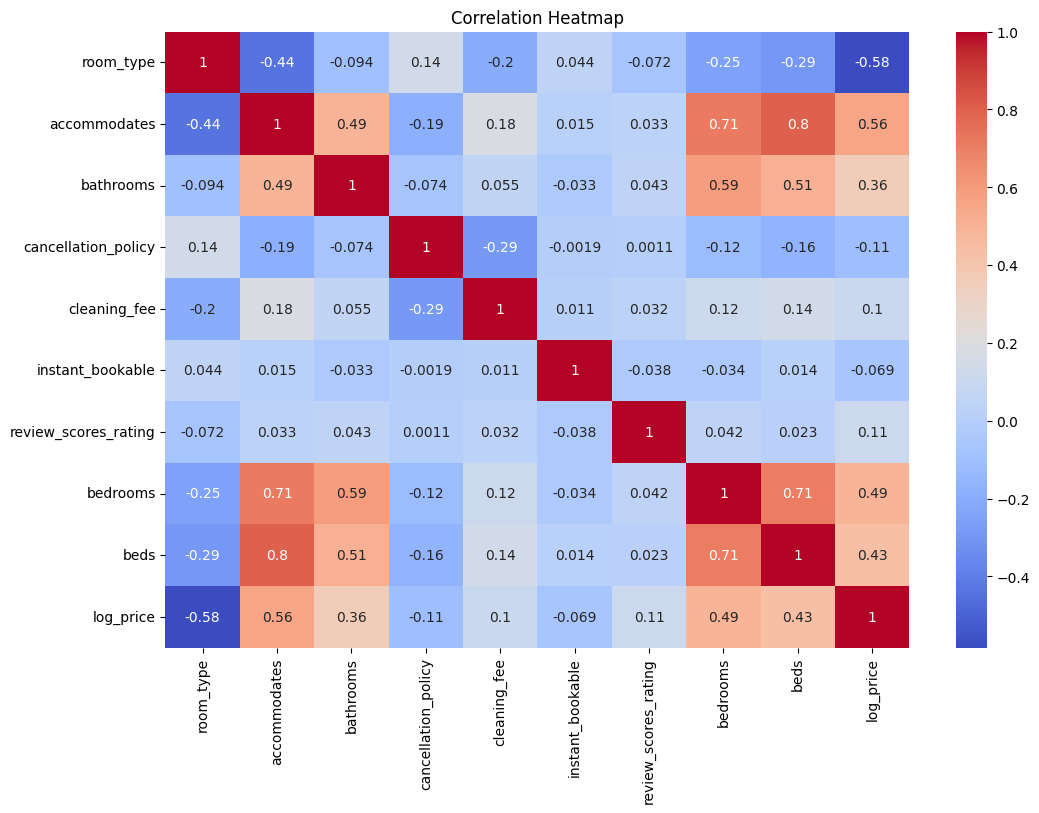

In [25]:
# Correlation Heatmap
# Plot a heatmap to show the correlation between different features in the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()